In [1]:
import os
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import sklearn
import math
import random

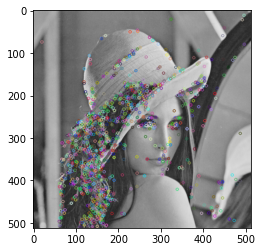

In [2]:
img1 = cv2.imread('lena.png')
img2 = cv2.imread('backpack_left.png')
img3 = cv2.imread('backpack_right.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Initialize SIFT Module
my_SIFT_instance = sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = my_SIFT_instance.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = my_SIFT_instance.detectAndCompute(img2,None)
keypoints_3, descriptors_3 = my_SIFT_instance.detectAndCompute(img3,None)

img_1 = cv2.drawKeypoints(gray1 , keypoints_1, img1)
img_2 = cv2.drawKeypoints(gray2 , keypoints_2, img2)
img_3 = cv2.drawKeypoints(gray3 , keypoints_3, img3)

plt.imshow(img_1)

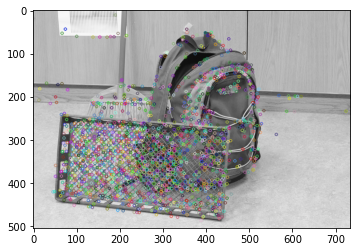

In [3]:
plt.imshow(img_2)

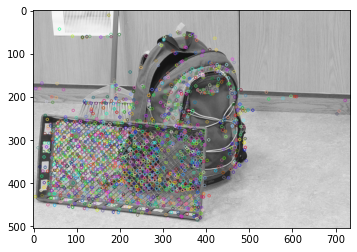

In [4]:
plt.imshow(img_3)

In [5]:
feature = cv2.BFMatcher()
lenamatches = feature.knnMatch(descriptors_1,descriptors_1, k=2)    

tempOut = np.zeros((img1.shape[0],img1.shape[1]),dtype=np.uint8)  
lenaknn = cv2.drawMatchesKnn(gray1,keypoints_1,gray1,keypoints_1,lenamatches,tempOut)

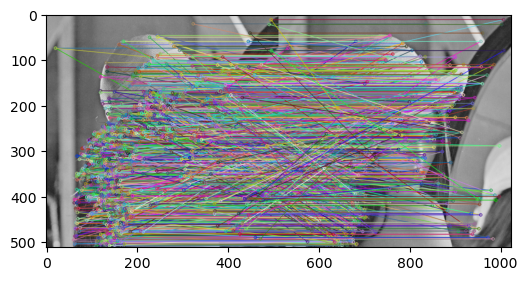

In [6]:
plt.figure(dpi=100)
plt.imshow(lenaknn)

In [7]:
feature = cv2.BFMatcher()
backmatches = feature.knnMatch(descriptors_2,descriptors_3, k=2)    

tempOut = np.zeros((img2.shape[0],img3.shape[1]),dtype=np.uint8)    
backknn = cv2.drawMatchesKnn(gray2,keypoints_2,gray3,keypoints_3,backmatches,tempOut)

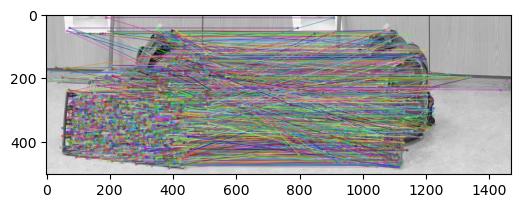

In [8]:
plt.figure(dpi=100)
plt.imshow(backknn)

In [9]:
lenagood = []
lenamdis = []
lenaMatchDistance = []
for m,n in lenamatches:
    md = m.distance
    nd = n.distance
    lenamdis.append(md) 
    ratio = md / nd
    tau = 0.8
    if ratio < tau:
        lenagood.append([m])
        lenaMatchDistance.append(md)

tempOut = np.zeros((img1.shape[0],img1.shape[1]),dtype=np.uint8)   
lenalrt = cv2.drawMatchesKnn(gray1,keypoints_1,gray1,keypoints_1,lenagood,tempOut)

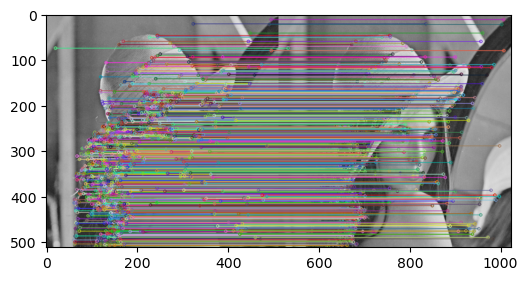

In [10]:
plt.figure(dpi=100)
plt.imshow(lenalrt)

In [11]:
backgood = []
backmdis = []
backMatchDistance = []
for m,n in backmatches:
    md = m.distance
    nd = n.distance
    backmdis.append(md) 
    ratio = md / nd
    tau = 0.8
    if ratio < tau:
        backgood.append([m])
        backMatchDistance.append(md)

tempOut = np.zeros((img2.shape[0],img3.shape[1]),dtype=np.uint8)    
backlrt = cv2.drawMatchesKnn(gray2,keypoints_2,gray3,keypoints_3,backgood,tempOut)

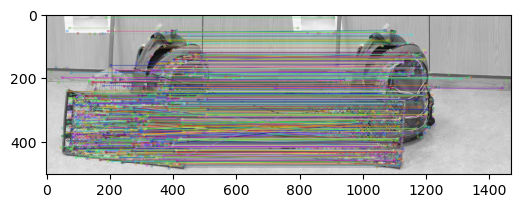

In [12]:
plt.figure(dpi=100)
plt.imshow(backlrt)

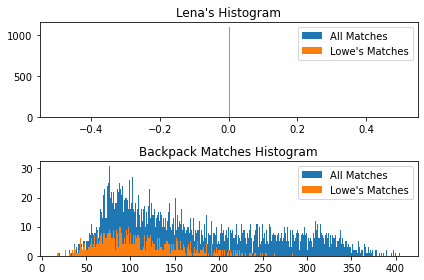

In [13]:
#plt.figure(dpi=100)

plt.subplot(2,1,1)
plt.hist(lenamdis, 200,label="All Matches")
plt.hist(lenaMatchDistance, 200,label="Lowe's Matches")
plt.legend()
plt.title("Lena's Histogram")


plt.subplot(2,1,2)
plt.hist(backmdis,350,label="All Matches")
plt.hist(backMatchDistance,350,label="Lowe's Matches")
plt.legend()
plt.title("Backpack Matches Histogram")


plt.tight_layout()

#### Some unproper match are thrown after the Lowe's ratio test. Therefore the numerical of y-axie are decreased which just leave the proper matches. This result can show that the Lowe's ratio test is useful in filting good point.  
#### The samller distance means the degree of similarity between two images is high. It can be noticed that lena.png use the same picture, so the distance between these two pictures is 0, and the histogram show there just has a vertical line. In backpack_right.png and backpack_left.png, the well matched point is small and the unproper point is long, we have already throw out the unproper point, so the maximum x of Lowe's is smailler than original one.